In [1]:
# 防止内核挂掉
import os
os.environ["KMP_DUPLICATE_LIB_OK"]  =  "TRUE"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.autograd import Variable
import torch

# 非线性回归

## 先准备带有噪声的非线性散点

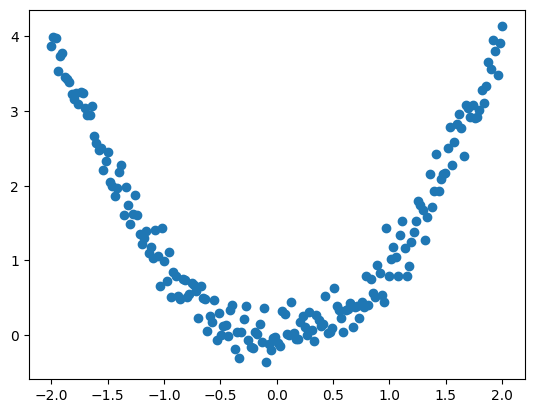

In [3]:
# 构建非线性分布的数据
x_data = np.linspace(-2, 2, 200)[:, np.newaxis] # -2到2均匀变大
noise = np.random.normal(0, 0.2, x_data.shape)

y_data = np.square(x_data) + noise

plt.scatter(x_data, y_data)
plt.show()

## 转换为pytorch模型所需要的参数形式

In [4]:
# 把numpy数据变成tensor
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)

# 变成pytorch数据的输入与标签
inputs = Variable(x_data)
target = Variable(y_data)

## 开始构建神经网络的模型

定义一个三层非线性回归网络

In [5]:
## 一般规范

# 自定义类名后继承nn.Module
# 一般把网络中有可学习参数的层定义在初始化函数中
class NonlinearRegression(nn.Module):
    # 初始化，定义网络结构
    def __init__(self):
        # 初始化父类
        super(NonlinearRegression, self).__init__()
        ## 1-10-1 的网络结构
        # 全连接层1
        self.fc1 = nn.Linear(1, 10) # 输入维数1，输出维数10
        # 隐藏层，定义激活函数
        self.tanh = nn.Tanh() # 使用一个双曲正切激活函数
        # 全连接层2，相当于输出层
        self.fc2 = nn.Linear(10, 1)
        
    # 前向传播，定义网络计算
    def forward(self, x):
        # 把信号(x)传给网络，得到输出值
        # 第一层 全连接层1
        layer1 = self.fc1(x)
        # 第二层 隐藏层
        layer2 = self.tanh(layer1)
        # 第三层 全连接层2
        layer3 = self.fc2(layer2)
        return layer3

In [6]:
# 定义模型
model = NonlinearRegression()

# 定义损失函数
mse_loss = nn.MSELoss() # 均方误差损失(Mean Square Error)

# 定义优化器
optimizer = optim.SGD(model.parameters(), lr=0.3) # 随机梯度下降(Stochastic Gradient Descent)，学习率(learning rate)

## *查看参数

In [7]:
# 查看模型参数
for name, parameter in model.named_parameters():
    print(f'name: {name}, parameter: {parameter}')

name: fc1.weight, parameter: Parameter containing:
tensor([[-0.8080],
        [-0.6261],
        [-0.8240],
        [-0.5578],
        [-0.0446],
        [-0.1660],
        [ 0.0738],
        [-0.4150],
        [-0.2032],
        [ 0.6746]], requires_grad=True)
name: fc1.bias, parameter: Parameter containing:
tensor([ 0.3801, -0.2823,  0.1691,  0.2098, -0.3313,  0.9894, -0.5536,  0.9142,
         0.1456, -0.5224], requires_grad=True)
name: fc2.weight, parameter: Parameter containing:
tensor([[ 0.2555,  0.0974,  0.0096, -0.1649, -0.1744, -0.2420, -0.0937, -0.1683,
          0.0731,  0.1182]], requires_grad=True)
name: fc2.bias, parameter: Parameter containing:
tensor([0.2189], requires_grad=True)


定义完模型后开始训练模型

## 对模型进行训练

In [8]:
# 训练模型1000次
for i in range(2001):
    # 得到模型预测值
    out = model(inputs)
    
    # 计算损失loss
    loss = mse_loss(out, target)
    
    # 梯度清零
    # 不清零则每次训练梯度值都会累加
    optimizer.zero_grad()
    
    # 计算梯度
    loss.backward()
    
    # 修改权值
    optimizer.step()
    
    # 每200次打印一下损失
    if i % 200 == 0:
        print(f'{i}, loss={loss.item()}')

0, loss=3.232077121734619
200, loss=0.07638192176818848
400, loss=0.08360598236322403
600, loss=0.0827251449227333
800, loss=0.08394084870815277
1000, loss=0.08417370915412903
1200, loss=0.0842442587018013
1400, loss=0.08431441336870193
1600, loss=0.08441183716058731
1800, loss=0.08454053103923798
2000, loss=0.08465418219566345


看到损失值在逐渐变小

## 查看非线性回归的拟合结果

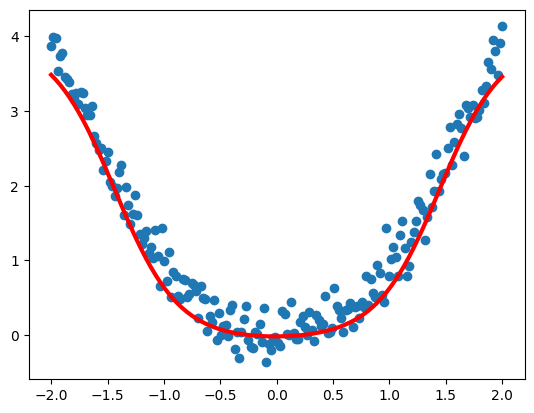

In [9]:
# 训练完后的预测值
y_pred = model(inputs)

plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred.data.numpy(), 'r-', lw=3)
plt.show()